- Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. 
Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, 
анализа настроений или распознавания именованных сущностей.
- Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. 
Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки 
данным на основе определенных шаблонов или критериев.
- Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.
- Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. 
Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.
- Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. 
Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.
- Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. 
Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import pandas as pd
import numpy as np

In [3]:
# для обучения был выбран датасет по ссылке https://www.kaggle.com/competitions/fake-news/data
# цель - научить ИИ определять фейковые новости
# загружаем файл с данными:
df = pd.read_csv('full_data.csv', engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")

In [4]:
df.head(3)

,title,author,text,label,id
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1.0,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0.0,2
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1.0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26014 entries, 0 to 26013
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   25329 non-null  object 
 1   author  23541 non-null  object 
 2   text    25953 non-null  object 
 3   label   25998 non-null  float64
 4   id      26014 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1016.3+ KB


In [6]:
# удаляем строки с отсутствующими данными в колонке 'text' и 'label'
df = df.dropna(subset=['text','label'])
# преобразуем тип поля 'label'
df['label'] = df['label'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25952 entries, 0 to 26013
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   25272 non-null  object
 1   author  23538 non-null  object
 2   text    25952 non-null  object
 3   label   25952 non-null  int64 
 4   id      25952 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.2+ MB


<Axes: >

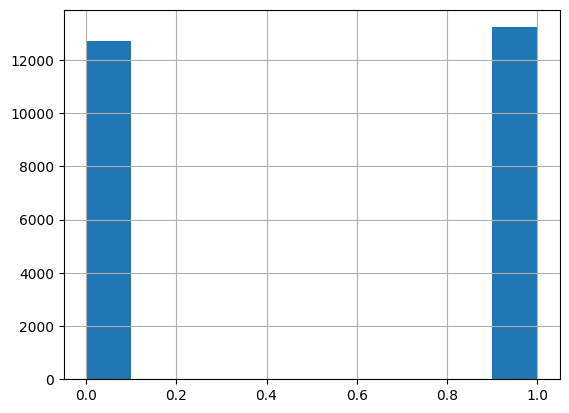

In [7]:
# смотрим распределение меток в датасете
df['label'].hist()

In [8]:
df.head(3)

,title,author,text,label,id
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,2
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,3


In [9]:
# Разделение датасета на размеченную 30% и неразмеченную выборки 70%
labeled_news, unlabeled_news = train_test_split(df, train_size=0.3, random_state=32)
labeled_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7785 entries, 12705 to 10990
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   7574 non-null   object
 1   author  7051 non-null   object
 2   text    7785 non-null   object
 3   label   7785 non-null   int64 
 4   id      7785 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 364.9+ KB


In [10]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_news):
    vectorizer = TfidfVectorizer()
    x = vectorizer.fit_transform(labeled_news['text'])
    y = labeled_news['label']
    model = LogisticRegression()
    model.fit(x, y)
    return model, vectorizer

In [11]:
# Обучение начальной модели на небольшом наборе размеченных данных
model, vectorizer = train_model(labeled_news)

In [12]:
# Использование полученной модели для прогнозирования неразмеченных данных
x_unlabeled = vectorizer.transform(unlabeled_news['text'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [13]:
# энтропия предсказанных значений
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)
uncertainty

array([0.72905535, 0.82636064, 0.43995591, ..., 0.80998199, 0.26768515,
       0.34314305])

In [14]:
# Выбор 100 наиболее неопределенных точек данных для проверки и маркировки человеком
labeled_news_new = unlabeled_news.iloc[uncertainty.argsort()[:100]]
unlabeled_news_new = unlabeled_news.iloc[uncertainty.argsort()[100:]]
# сохраняем в отдельный файл
labeled_news_new.to_csv('for_labeling.csv', index=False)

In [15]:
# разметка в Label Stidio и сохранение в файл for_labeling_ready.csv
# скриншот разметки прилагается

In [22]:
# загрузка размеченных данных
labeled_news_new = pd.read_csv('for_labeling_ready.csv', engine='python', encoding='utf-8', on_bad_lines="skip", encoding_errors="ignore")
labeled_news_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   annotation_id  99 non-null     int64  
 1   annotator      99 non-null     int64  
 2   author         99 non-null     object 
 3   created_at     99 non-null     object 
 4   id             99 non-null     int64  
 5   label          99 non-null     int64  
 6   lead_time      99 non-null     float64
 7   sentiment      99 non-null     object 
 8   text           99 non-null     object 
 9   title          99 non-null     object 
 10  updated_at     99 non-null     object 
dtypes: float64(1), int64(4), object(6)
memory usage: 8.6+ KB


In [27]:
# результат разметки
labeled_news_new['sentiment']

0       reliable
1     unreliable
2       reliable
3       reliable
4       reliable
         ...    
94      reliable
95      reliable
96      reliable
97      reliable
98      reliable
Name: sentiment, Length: 99, dtype: object

In [28]:
# проставляем метки на основе поля 'sentiment'
labeled_news_new['label'] = labeled_news_new['sentiment'].replace({'reliable': 0, 'unreliable': 1})

C:\Users\user\AppData\Local\Temp\ipykernel_2404\4294678859.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labeled_news_new['label'] = labeled_news_new['sentiment'].replace({'reliable': 0, 'unreliable': 1})


In [30]:
# проверка меток
labeled_news_new['label']

0     0
1     1
2     0
3     0
4     0
     ..
94    0
95    0
96    0
97    0
98    0
Name: label, Length: 99, dtype: int64

In [33]:
# добавление данных после маркировки человеком к размеченному множеству
labeled_news = pd.concat([labeled_news, labeled_news_new])

In [34]:
labeled_news.head(3)

,title,author,text,label,id,annotation_id,annotator,created_at,lead_time,sentiment,updated_at
12705,Anonymous: There Is No One Way To Live On This...,Kalee Brown,Share on Facebook Share on Twitter It’s no sec...,1,12706,NaN,NaN,NaN,NaN,NaN,NaN
23975,Trump Campaign Was Just Ordered To Appear In C...,Grant Stern,Comments \nA federal judge in Nevada just drag...,0,23962,NaN,NaN,NaN,NaN,NaN,NaN
12989,Donald Trump’s Allies Battle for Favor of G.O....,Nicholas Confessore,"Carl Icahn was late, but he still had somethin...",0,12990,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
labeled_news.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8384 entries, 12705 to 98
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          8165 non-null   object 
 1   author         7642 non-null   object 
 2   text           8384 non-null   object 
 3   label          8384 non-null   int64  
 4   id             8384 non-null   int64  
 5   annotation_id  99 non-null     float64
 6   annotator      99 non-null     float64
 7   created_at     99 non-null     object 
 8   lead_time      99 non-null     float64
 9   sentiment      99 non-null     object 
 10  updated_at     99 non-null     object 
dtypes: float64(3), int64(2), object(6)
memory usage: 786.0+ KB


In [36]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_news)

In [37]:
news_test = unlabeled_news
news_test

,title,author,text,label,id
5525,Top 6 Foods That Naturally Unclog Arteries,REALdeal,Your arteries are the system within your body ...,1,5526
1739,Blue State Blues: Why Do Democrats Undermine L...,Joel B. Pollak,There is something decidedly odd about the Cal...,0,1740
16172,America and Lackeys Insult People of the World,Finian Cunningham,America and Lackeys Insult People of the Worl...,1,16173
19103,If Soros Is Jewish Like They Say We Jews Shoul...,A Jew (UID 73270427),Report Copyright Violation If Soros Is Jewish ...,1,19104
4115,An Alternate Narrative on Hillary Clinton and ...,Matt Peppe,Email \nElections in the United States are far...,1,4116
...,...,...,...,...,...
17261,Ben Stein: ’Trump Didn’t Do Anything Wrong’ - ...,Trent Baker,"During Saturday’s “Cavuto on Business,” former...",0,17262
8059,Bernie and the Sandernistas,stclair,Post was not sent - check your email addresses...,1,8060
24591,Joe Biden Plans to Stay Involved in Politics A...,Katherine Rodriguez,Vice President Joe Biden said Wednesday that h...,1,24578
16160,Bangladeshi Troops Move to End Hostage Standof...,"Julfikar Ali Manik, Geeta Anand and Russell Go...","DHAKA, Bangladesh — Bangladeshi Army troops...",0,16161


In [38]:
# # проверка результатов
X_test = vectorizer.transform(news_test['text'])
y_test_predicted = model.predict(X_test)
# выводим полученный коэффициент точности
f1 = f1_score(news_test['label'], y_test_predicted)
f1

0.8642880241457368

- Вывод - коэффициент точности предсказаний довольно высокий и составляет 0.864